# Astronomy example
*December 22, 2020*

This notebook shows some examples on how `iniabu` could be used in an astronomy / astrophysics context. As before, we first load the package. Here we use the `inimf` instance that returns all values as mass fractions.

The first two lines here adds the package to your python path in case you have not installed it and just cloned the repository with this notebook in it. Otherwise, feel free to comment them out.

In [1]:
import sys
sys.path.insert(0, '../../')  # add iniabu to python path from this repo

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from iniabu import inimf  # load iniabu into inimf: mass fraction units

Let's first make sure we have the database and units that we want available

In [4]:
print(f"Database: {inimf.database}, Units: {inimf.unit}")

Database: lodders09, Units: mass_fraction


## Set up "observations"
Let us assume we observed some stars that have randomly less iron than the sun, but the same amount of hydrogen and more barium.

In [11]:
# number of observations
num_obs = 20

# set up observations
h_obs = np.ones(num_obs) * inimf.ele["H"].abu_solar
fe_obs = inimf.ele["Fe"].abu_solar * np.random.rand(num_obs)
ba_obs = inimf.ele["Ba"].abu_solar * (1 + np.random.rand(num_obs))

## Plot the observations

Let's have a look at the observations. We'll plot [Ba/H] on the y axis and [Fe/H] on the x axis.

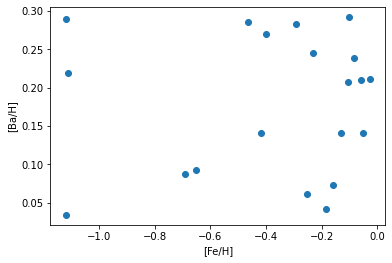

In [12]:
# create x and y data
xdata = inimf.ele_bracket("Fe", "H", fe_obs / h_obs)
ydata = inimf.ele_bracket("Ba", "H", ba_obs / h_obs)

# Make the plot
plt.plot(xdata, ydata, 'o')
plt.xlabel('[Fe/H]')
plt.ylabel('[Ba/H]')
plt.show()

## Plot solar abundances as logarithmic units

Another way to import `iniabu` is by using logarithmic units. we can either switch the units or simply use `from iniabu import inilog`. Let's switch the units and see how to plot all abundances.

In [14]:
inimf.unit = "num_log"

To get all elements, we can use the keys of the element dictionary, as shown in the [intro notebook](introduction.ipynb)

Text(0, 0.5, 'Logarithmic abundance ([H] = 12)')

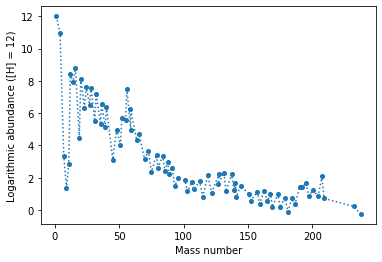

In [16]:
ele_names = inimf.ele_dict.keys()
eles = inimf.ele[list(ele_names)]

# now plot the elemet mass vs. the logarithmic abundance:
plt.plot(eles.mass, eles.abu_solar, ':o', ms=4)
plt.xlabel('Mass number')
plt.ylabel('Logarithmic abundance ([H] = 12)')

## Summary

The `iniabu` python package allows you to directly calculate element ratios in bracket notation. Furthermore you can directly work with mass fraction or logarithmic abunda

More usage cases are discussed in with jupyter notebook examples. In addition you can have a look at the package documentation [here](https://iniabu.readthedocs.io) or by looking at the docstring of any function.

If you encounter issues, please post them to the [`iniabu` GitHub page](https://github.com/galactic-forensics/iniabu). There you can also find a discussion forum.